In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import regex as re
from scipy import stats
from sklearn.pipeline import Pipeline
import os
import joblib

In [2]:
import sys, sklearn
print(sys.executable)
print(sklearn.__version__)

c:\Users\Atharva\AppData\Local\Programs\Python\Python312\python.exe
1.8.0


In [3]:
print("sklearn:", sklearn.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

sklearn: 1.8.0
numpy: 2.3.5
pandas: 2.3.3


In [4]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, "data", "india_housing_prices.csv")

In [5]:
house = pd.read_csv(DATA_PATH) # Update this path with the correct path to your file
house.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [6]:
house.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [7]:
house.isna()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
house.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [9]:
house.drop(13422)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [10]:
house.isna()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
house.drop(134223, inplace=True)

In [12]:
# Strip column names
house.columns = house.columns.str.strip()

# Numeric columns
num_cols = [
    "BHK",
    "Size_in_SqFt",
    "Price_per_SqFt",
    "Nearby_Schools",
    "Nearby_Hospitals"
]

for col in num_cols:
    house[col] = pd.to_numeric(house[col], errors="coerce")
    house[col] = house[col].fillna(house[col].median())

# Clip outliers (DO NOT DROP)
house["Price_per_SqFt"] = house["Price_per_SqFt"].clip(
    house["Price_per_SqFt"].quantile(0.01),
    house["Price_per_SqFt"].quantile(0.99)
)

In [13]:
Q1 = house['Price_per_SqFt'].quantile(0.25)
Q3 = house['Price_per_SqFt'].quantile(0.75)
IQR = Q3 - Q1
house['Price_per_SqFt'] = house[(house['Price_per_SqFt'] >= Q1 - 1.5*IQR) & (house['Price_per_SqFt'] <= Q3 + 1.5*IQR)]['Price_per_SqFt']

In [14]:
house.drop_duplicates(inplace=True)

In [15]:
le = LabelEncoder()
encoded_LocaliTy = le.fit_transform(house['Locality'])
encoded_LocaliTy

array([483, 434,  75, ..., 140,  43, 187], shape=(249999,))

In [16]:
house['Locality']

0          Locality_84
1         Locality_490
2         Locality_167
3         Locality_393
4         Locality_466
              ...     
249995    Locality_187
249996    Locality_348
249997    Locality_225
249998    Locality_138
249999    Locality_268
Name: Locality, Length: 249999, dtype: object

In [17]:
house.groupby(['Price_in_Lakhs','City']).size().sort_values(ascending = True)

Price_in_Lakhs  City     
499.96          Jaipur       1
                Patna        1
                Surat        1
483.96          Indore       1
499.97          Dehradun     1
                            ..
474.59          Dwarka       4
237.90          Silchar      4
428.62          Kolkata      4
243.35          Faridabad    4
292.49          Dehradun     4
Length: 235008, dtype: int64

**1.What is the distribution of property prices?**

---








<Axes: xlabel='Price_in_Lakhs', ylabel='Density'>

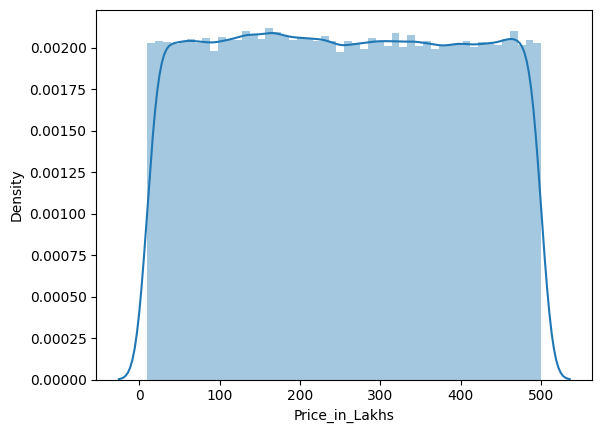

In [18]:
sns.distplot(house['Price_in_Lakhs'])

**2.What is the distribution of property sizes?**


---



<Axes: xlabel='Size_in_SqFt', ylabel='Density'>

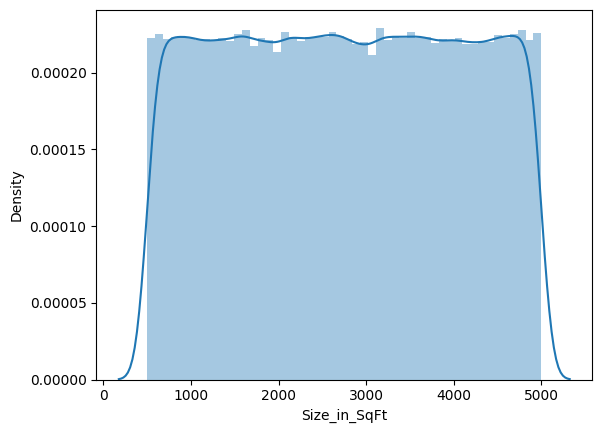

In [19]:
sns.distplot(house['Size_in_SqFt'])

In [20]:
house.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [21]:
house['Property_Type']

0                 Apartment
1         Independent House
2                 Apartment
3         Independent House
4                     Villa
                ...        
249995    Independent House
249996            Apartment
249997                Villa
249998                Villa
249999    Independent House
Name: Property_Type, Length: 249999, dtype: object

**3.How does price per sq ft vary by property type?**


---





In [22]:
house.groupby('Property_Type')['Price_per_SqFt'].mean()

Property_Type
Apartment            0.099951
Independent House    0.100222
Villa                0.099581
Name: Price_per_SqFt, dtype: float64

<Axes: xlabel='Property_Type', ylabel='Price_per_SqFt'>

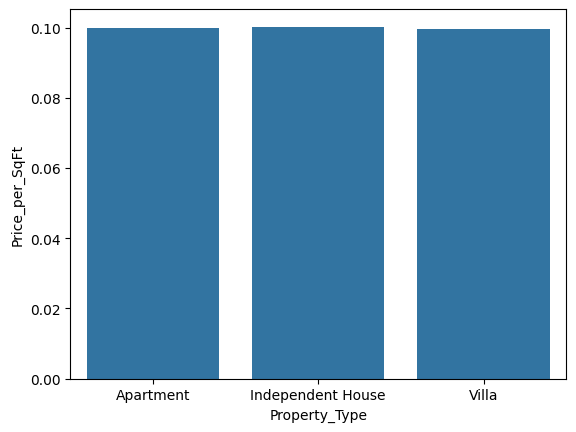

In [23]:
sns.barplot(house.groupby('Property_Type')['Price_per_SqFt'].mean())

**4.Is there a relationship between property size and price?**


---





<Axes: >

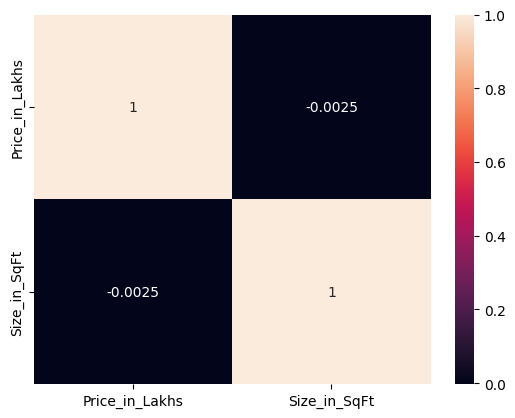

In [24]:
sns.heatmap(house[['Price_in_Lakhs','Size_in_SqFt']].corr(), annot=True)

**5.Are there any outliers in price per sq ft or property size?**


---






<Axes: ylabel='Price_per_SqFt'>

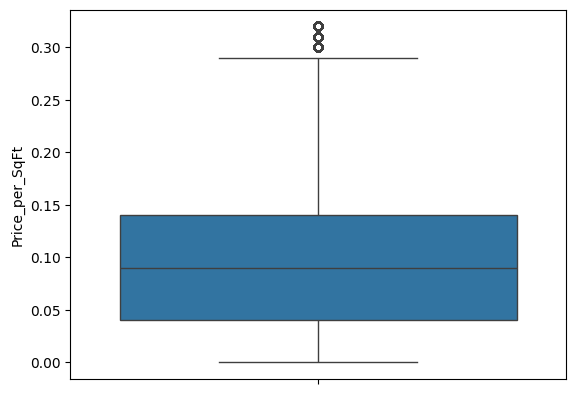

In [25]:
sns.boxplot(y='Price_per_SqFt', data=house)

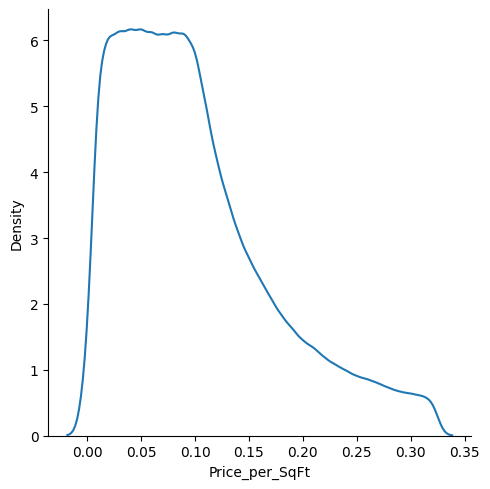

In [26]:
sns.displot(kind='kde',
           data=house,
           x='Price_per_SqFt')
plt.show()

**6.What is the average price per sq ft by state?**


---



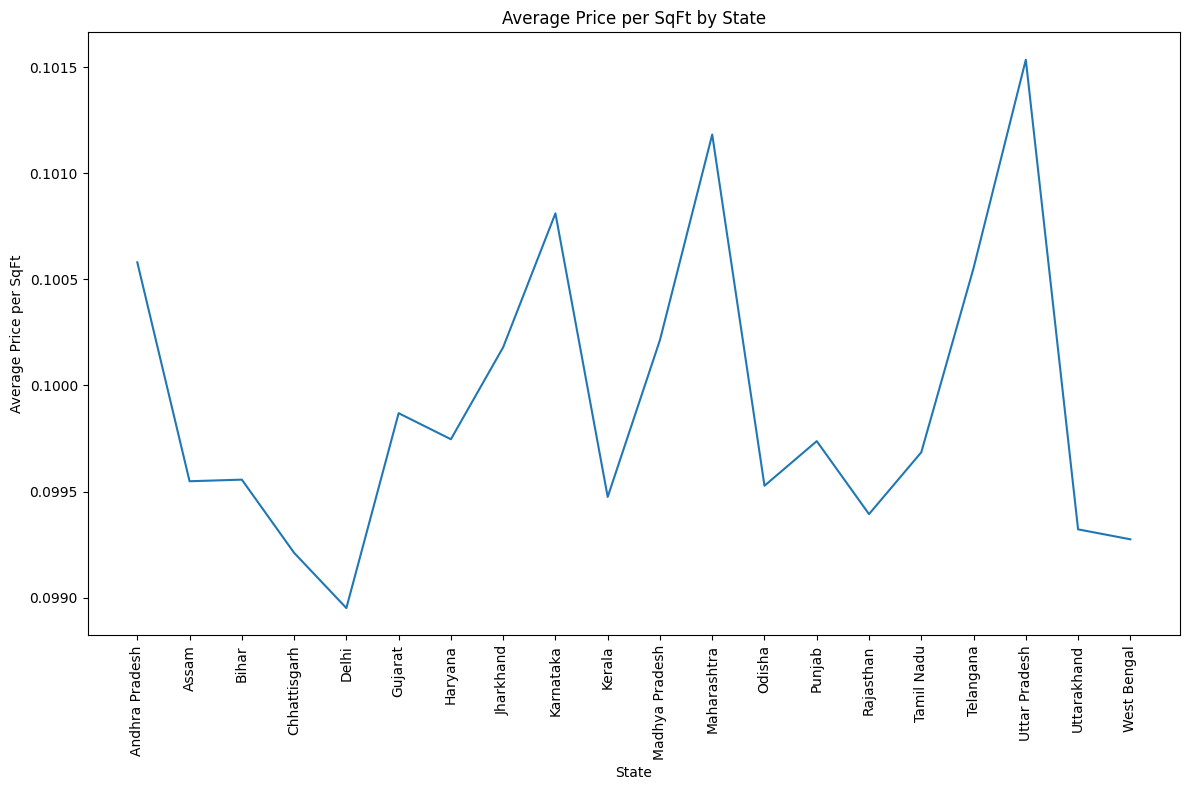

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(x=house.groupby(['State'])['Price_per_SqFt'].mean().index, y=house.groupby(['State'])['Price_per_SqFt'].mean().values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Price per SqFt')
plt.title('Average Price per SqFt by State')
plt.tight_layout()
plt.show()

**7.What is the average property price by city?**



---



<Axes: xlabel='City'>

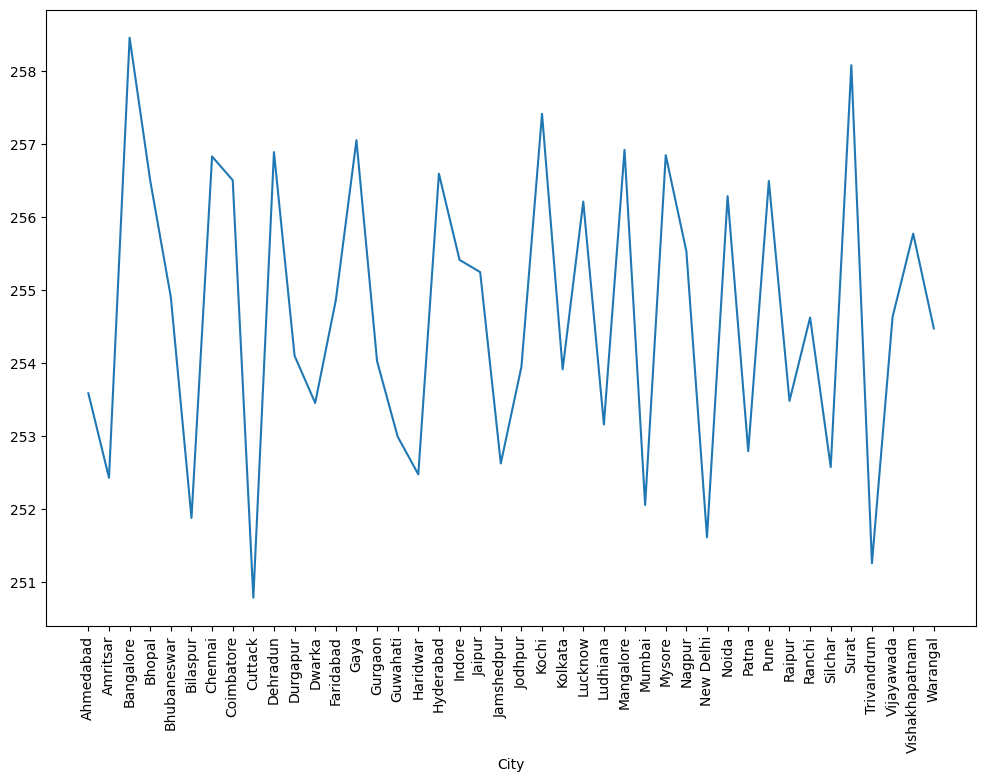

In [28]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.lineplot(x=house.groupby(['City'])['Price_in_Lakhs'].mean().index,y=house.groupby(['City'])['Price_in_Lakhs'].mean().values)

**8.What is the median age of properties by locality?**



---



<Axes: xlabel='Locality'>

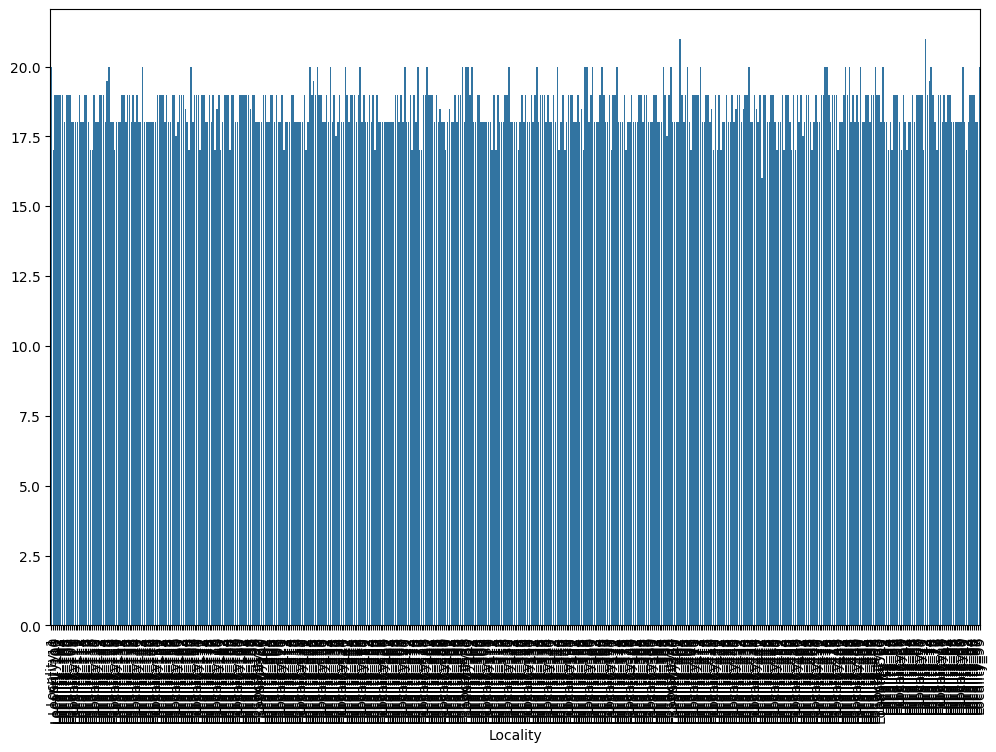

In [29]:
#house.groupby(['City'])['Age_of_Property'].median()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=house.groupby(['Locality'])['Age_of_Property'].median().index,y=house.groupby(['Locality'])['Age_of_Property'].median().values)

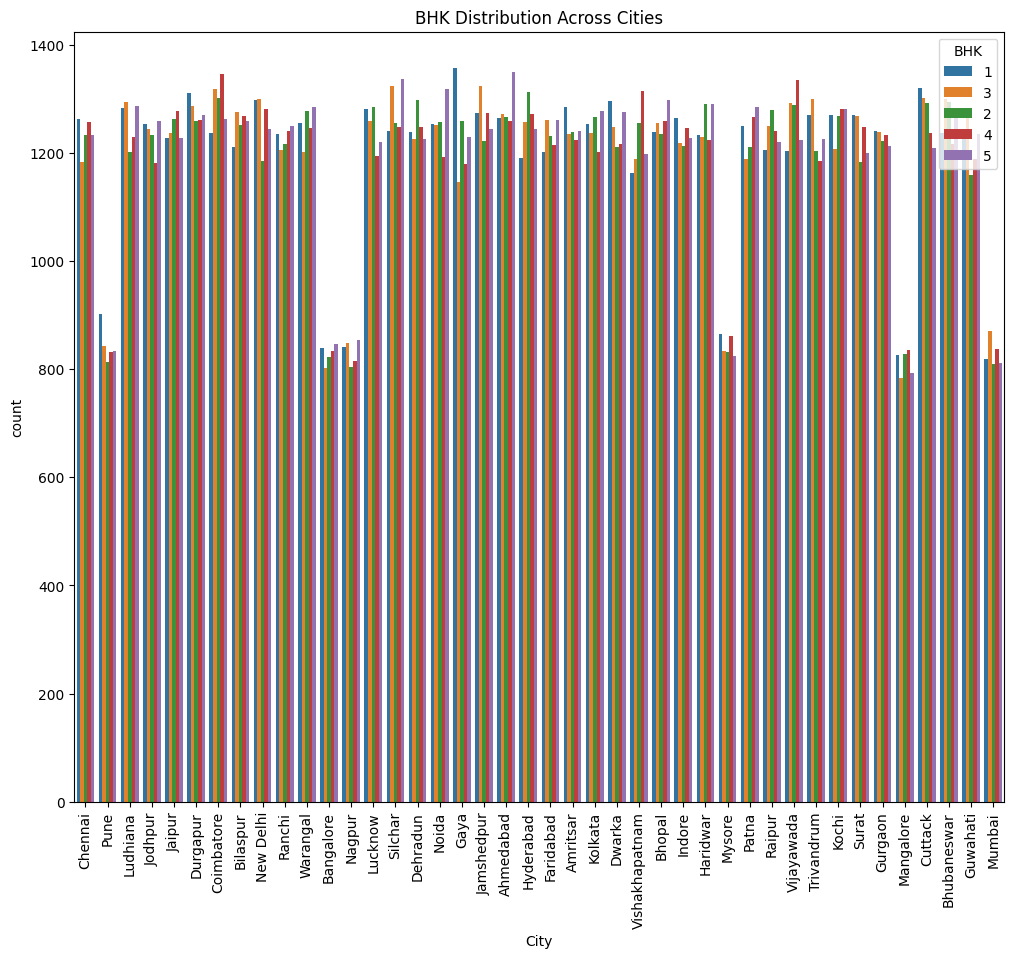

In [30]:
house["City"] = house["City"].astype(str)
house["BHK"] = house["BHK"].astype(str)

plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(data=house, x="City", hue="BHK")
plt.title("BHK Distribution Across Cities")
plt.show()

**10.What are the price trends for the top 5 most expensive localities?**


In [31]:
top_5_localities = house.groupby(['Locality'])['Price_per_SqFt'].mean().sort_values(ascending=False).head(5)
print("Top 5 Most Expensive Localities:")
top_5_localities

Top 5 Most Expensive Localities:


Locality
Locality_274    0.109131
Locality_416    0.109076
Locality_395    0.107500
Locality_338    0.107333
Locality_420    0.107214
Name: Price_per_SqFt, dtype: float64

**11.How are numeric features correlated with each other?**

---



<Axes: >

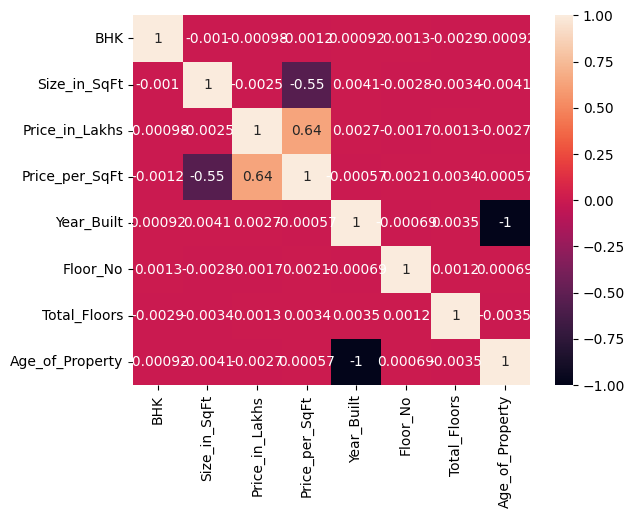

In [32]:
sns.heatmap(house[['BHK','Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt','Year_Built','Floor_No','Total_Floors','Age_of_Property']].corr(),annot=True)

In [33]:
house.drop('Age_of_Property', axis=1, inplace=True)

In [34]:
house

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Total_Floors,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,1,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,20,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,27,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,26,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,2,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,7,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,25,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,30,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,11,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [35]:
house.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

**12.How do nearby schools relate to price per sq ft?**



---






<Axes: xlabel='Nearby_Schools', ylabel='Price_in_Lakhs'>

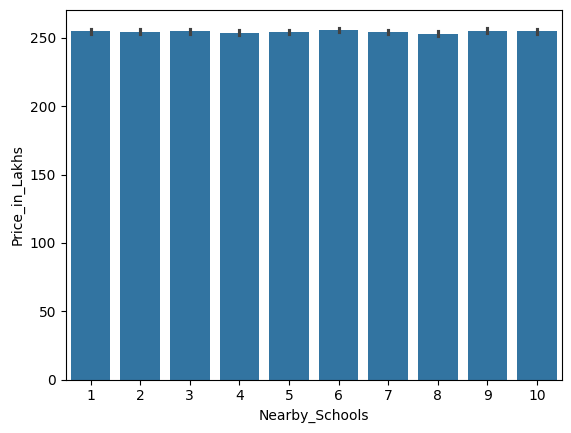

In [36]:
house[['Price_in_Lakhs','Nearby_Schools']]
sns.barplot(data=house,x='Nearby_Schools',y='Price_in_Lakhs')

<Axes: >

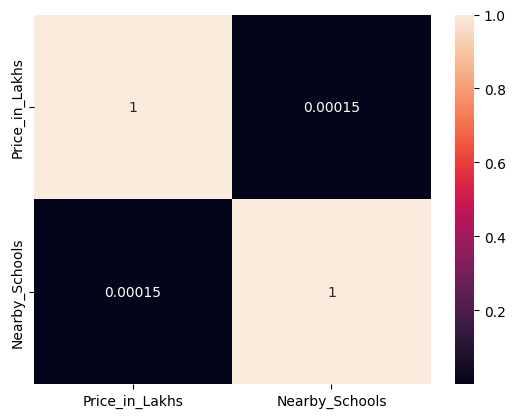

In [37]:
sns.heatmap(house[['Price_in_Lakhs','Nearby_Schools']].corr(),annot=True)

**13.How do nearby hospitals relate to price per sq ft?**



---





<Axes: xlabel='Nearby_Hospitals', ylabel='Price_in_Lakhs'>

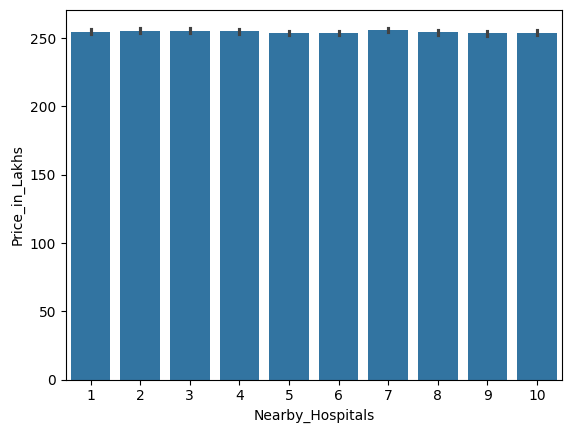

In [38]:
house[['Price_in_Lakhs','Nearby_Hospitals']]
sns.barplot(data=house,x='Nearby_Hospitals',y='Price_in_Lakhs')

<Axes: >

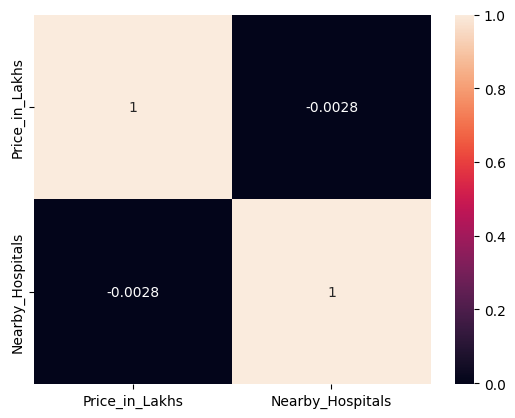

In [39]:
sns.heatmap(house[['Price_in_Lakhs','Nearby_Hospitals']].corr(),annot=True)

**14.How does price vary by furnished status?**

---


In [40]:
house.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

<Axes: xlabel='Furnished_Status'>

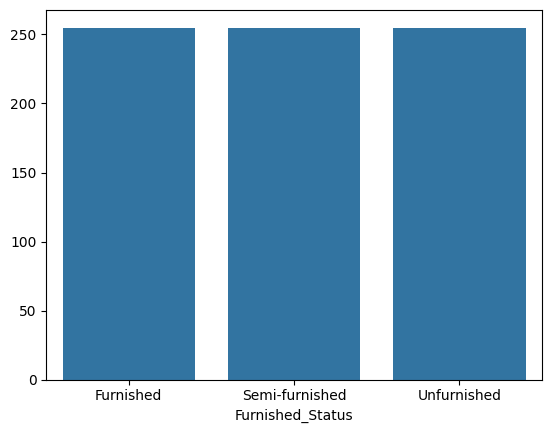

In [41]:
house[['Furnished_Status','Price_in_Lakhs']]
sns.barplot(x=house.groupby(['Furnished_Status'])['Price_in_Lakhs'].mean().index,y=house.groupby(['Furnished_Status'])['Price_in_Lakhs'].mean().values)

**15.How does price per sq ft vary by property facing direction?**


---






<Axes: xlabel='Facing'>

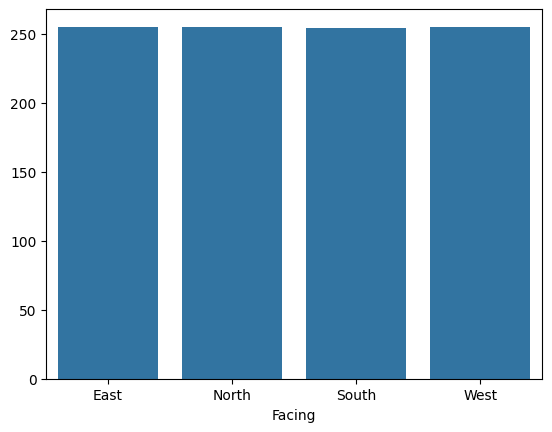

In [42]:
sns.barplot(x=house.groupby(['Facing'])['Price_in_Lakhs'].mean().index,y=house.groupby(['Facing'])['Price_in_Lakhs'].mean().values)

**16.How many properties belong to each owner type?**

---



In [43]:
house['Owner_Type']


0           Owner
1         Builder
2          Broker
3         Builder
4         Builder
           ...   
249995     Broker
249996     Broker
249997    Builder
249998      Owner
249999      Owner
Name: Owner_Type, Length: 249999, dtype: object

**17.How many properties are available under each availability status?**


---



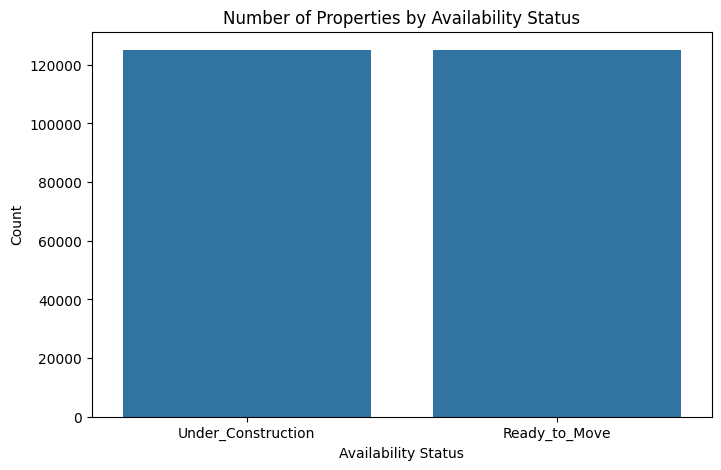

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=house,
    x="Availability_Status",
    order=house["Availability_Status"].value_counts().index
)
plt.title("Number of Properties by Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Count")
plt.show()

**18.Does parking space affect property price?**


---






<Axes: xlabel='Parking_Space'>

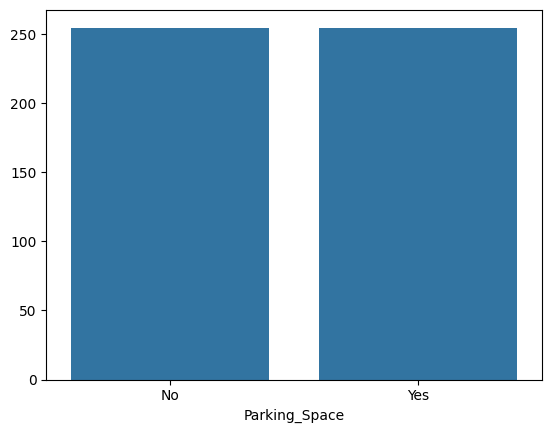

In [45]:
sns.barplot(x=house.groupby(['Parking_Space'])['Price_in_Lakhs'].mean().index,y=house.groupby(['Parking_Space'])['Price_in_Lakhs'].mean().values)

In [46]:
house.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

**19.How do amenities affect price per sq ft?**

---






<Axes: xlabel='Amenities'>

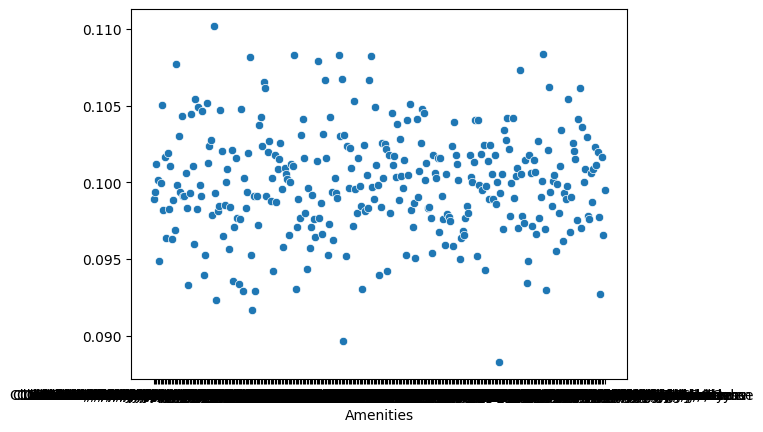

In [47]:
sns.scatterplot(x=house.groupby(['Amenities'])['Price_per_SqFt'].mean().index,y=house.groupby(['Amenities'])['Price_per_SqFt'].mean().values)

**20.How does public transport accessibility relate to price per sq ft or investment potential?**



---



In [48]:
house[['Public_Transport_Accessibility','Price_per_SqFt']]

,Public_Transport_Accessibility,Price_per_SqFt
0,High,0.10
1,Low,0.08
2,Low,0.05
3,High,0.11
4,Low,0.04
...,...,...
249995,Low,0.14
249996,Low,0.01
249997,High,0.08
249998,Low,0.12


In [49]:
house.groupby(['Public_Transport_Accessibility'])['Price_per_SqFt'].mean()

Public_Transport_Accessibility
High      0.099478
Low       0.100176
Medium    0.100101
Name: Price_per_SqFt, dtype: float64

<Axes: xlabel='Public_Transport_Accessibility'>

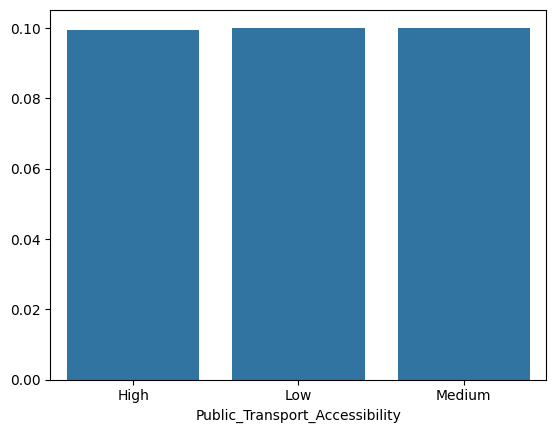

In [50]:
sns.barplot(x=house.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean().index,
            y=house.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean().values)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Task
Develop a classification model using the dataset at "https://colab.research.google.com/drive/1LTMNbkUgx_lvwozYYT6gjJx2vbYY1CVN#scrollTo=mdrQqvw9j_0I&line=1&uniqifier=1".

## Identify the target variable

### Subtask:
Determine which column in the dataset will be the target variable for classification.


**Reasoning**:
To determine the target variable for a classification model, I need to examine the columns in the DataFrame and identify a categorical or class-based variable that would be meaningful to predict in a housing context. Based on the column names displayed in the previous output, 'Availability_Status' seems like a good candidate as it indicates whether a property is 'Ready_to_Move' or 'Under_Construction', which are distinct categories. I will display the unique values of this column to confirm its suitability as a classification target.



In [52]:
display(house['Availability_Status'].unique())

array(['Ready_to_Move', 'Under_Construction'], dtype=object)

## Data preprocessing

### Subtask:
Prepare the data for the classification model, including handling categorical variables, splitting the data, and scaling features if necessary.


**Reasoning**:
Identify categorical columns and apply one-hot encoding to prepare data for modeling.



In [53]:
categorical_cols = ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type']
house_encoded = pd.get_dummies(house, columns=categorical_cols, drop_first=True)
display(house_encoded.head())

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,...,"Amenities_Pool, Playground, Gym","Amenities_Pool, Playground, Gym, Clubhouse","Amenities_Pool, Playground, Gym, Clubhouse, Garden","Amenities_Pool, Playground, Gym, Garden","Amenities_Pool, Playground, Gym, Garden, Clubhouse",Facing_North,Facing_South,Facing_West,Owner_Type_Builder,Owner_Type_Owner
0,1,1,4740,489.76,0.10,1990,22,1,10,3,...,False,False,False,False,False,False,False,True,False,True
1,2,3,2364,195.52,0.08,2008,21,20,8,1,...,False,False,False,False,False,True,False,False,True,False
2,3,2,3642,183.79,0.05,1997,19,27,9,8,...,False,False,False,False,False,False,True,False,False,False
3,4,2,2741,300.29,0.11,1991,21,26,5,7,...,False,False,False,False,False,True,False,False,True,False
4,5,4,4823,182.90,0.04,2002,3,2,4,9,...,False,False,False,False,False,False,False,False,True,False


In [54]:
house_encoded['Good_Investment'] = ((house_encoded['Size_in_SqFt'] > house_encoded['Size_in_SqFt'].median()) &
                           (house_encoded['Price_in_Lakhs'] < house_encoded['Price_in_Lakhs'].median())).astype(int)

house_encoded

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,...,"Amenities_Pool, Playground, Gym, Clubhouse","Amenities_Pool, Playground, Gym, Clubhouse, Garden","Amenities_Pool, Playground, Gym, Garden","Amenities_Pool, Playground, Gym, Garden, Clubhouse",Facing_North,Facing_South,Facing_West,Owner_Type_Builder,Owner_Type_Owner,Good_Investment
0,1,1,4740,489.76,0.10,1990,22,1,10,3,...,False,False,False,False,False,False,True,False,True,0
1,2,3,2364,195.52,0.08,2008,21,20,8,1,...,False,False,False,False,True,False,False,True,False,0
2,3,2,3642,183.79,0.05,1997,19,27,9,8,...,False,False,False,False,False,True,False,False,False,1
3,4,2,2741,300.29,0.11,1991,21,26,5,7,...,False,False,False,False,True,False,False,True,False,0
4,5,4,4823,182.90,0.04,2002,3,2,4,9,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,5,1995,274.75,0.14,1995,19,7,8,6,...,False,False,False,False,False,False,False,False,False,0
249996,249997,1,2293,13.40,0.01,2013,15,25,8,10,...,False,False,False,False,False,True,False,False,False,0
249997,249998,4,2910,236.94,0.08,2003,21,30,10,4,...,False,False,False,False,False,True,False,True,False,1
249998,249999,1,1149,141.66,0.12,2007,14,11,3,7,...,False,False,False,False,False,True,False,False,True,0


**Reasoning**:
Separate features and target variable, then split the data into training and testing sets.



In [55]:
X = house_encoded.drop(['Availability_Status', 'Good_Investment'], axis=1)
y = house_encoded['Good_Investment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(y_train.head())

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,...,"Amenities_Pool, Playground, Gym","Amenities_Pool, Playground, Gym, Clubhouse","Amenities_Pool, Playground, Gym, Clubhouse, Garden","Amenities_Pool, Playground, Gym, Garden","Amenities_Pool, Playground, Gym, Garden, Clubhouse",Facing_North,Facing_South,Facing_West,Owner_Type_Builder,Owner_Type_Owner
75381,75382,5,4189,38.31,0.01,1996,8,14,2,2,...,False,False,False,False,False,False,False,True,False,False
65569,65570,2,4651,64.08,0.01,2020,11,10,10,6,...,False,False,False,False,False,False,False,False,False,True
163474,163475,4,4144,363.34,0.09,1996,5,11,2,10,...,False,False,False,False,False,True,False,False,False,False
90518,90519,1,4360,129.01,0.03,2020,25,2,6,7,...,False,False,False,False,False,False,False,False,True,False
138867,138868,3,1380,91.04,0.07,2006,27,2,9,1,...,False,False,False,False,False,False,True,False,False,False


75381     1
65569     1
163474    0
90518     1
138867    0
Name: Good_Investment, dtype: int64

**Reasoning**:
Identify numerical columns and apply standard scaling to the numerical features in the training and testing sets.



In [56]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Nearby_Schools', 'Nearby_Hospitals']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
display(X_train.head())

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,...,"Amenities_Pool, Playground, Gym","Amenities_Pool, Playground, Gym, Clubhouse","Amenities_Pool, Playground, Gym, Clubhouse, Garden","Amenities_Pool, Playground, Gym, Garden","Amenities_Pool, Playground, Gym, Garden, Clubhouse",Facing_North,Facing_South,Facing_West,Owner_Type_Builder,Owner_Type_Owner
75381,75382,1.413831,1.107478,-1.529395,-1.245890,-1.072534,-0.776854,-0.174198,-1.215925,-1.217730,...,False,False,False,False,False,False,False,True,False,False
65569,65570,-0.706073,1.462537,-1.347325,-1.245890,1.372000,-0.441476,-0.635704,1.561969,0.175467,...,False,False,False,False,False,False,False,False,False,True
163474,163475,0.707196,1.072894,0.767007,-0.138147,-1.072534,-1.112231,-0.520327,-1.215925,1.568664,...,False,False,False,False,False,True,False,False,False,False
90518,90519,-1.412707,1.238895,-0.888581,-0.968954,1.372000,1.123618,-1.558717,0.173022,0.523766,...,False,False,False,False,False,False,False,False,True,False
138867,138868,0.000562,-1.051312,-1.156847,-0.415083,-0.053979,1.347203,-1.558717,1.214732,-1.566029,...,False,False,False,False,False,False,True,False,False,False


## Model selection

### Subtask:
Choose an appropriate classification model.


## Model training

### Subtask:
Train the selected Logistic Regression model using the prepared training data.


**Reasoning**:
Import LogisticRegression and train the model.



**Reasoning**:
The traceback indicates that there are NaN values in the training data X_train. I need to handle these missing values before training the Logistic Regression model. Since the previous attempt to remove outliers in 'Price_per_SqFt' introduced NaNs, I will drop the rows with NaNs in 'Price_per_SqFt'.



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
import joblib
import os

In [58]:
# Shape of dataset
print("Shape:", house.shape)

# Column names
print("\nColumns:")
print(house.columns)

# Check missing values
print("\nMissing values:")
print(house.isna().sum())


Shape: (249999, 22)

Columns:
Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

Missing values:
ID                                    0
State                                 0
City                                  0
Locality                              0
Property_Type                         0
BHK                                   0
Size_in_SqFt                          0
Price_in_Lakhs                        0
Price_per_SqFt                    20019
Year_Built                            0
Furnished_Status                      0
Floor_No                              0
Total_Floors                          0
Nearby_Schools                        0
N

In [59]:
house = house.dropna(subset=["Price_per_SqFt"]).reset_index(drop=True)

In [60]:
house["Price_per_SqFt"].isna().sum()

np.int64(0)

In [61]:
city_avg_price = house.groupby("City")["Price_per_SqFt"].transform("mean")
house["Good_Investment"] = (house["Price_per_SqFt"] <= city_avg_price).astype(int)
house[["City", "Price_per_SqFt", "Good_Investment"]].head()

,City,Price_per_SqFt,Good_Investment
0,Chennai,0.10,0
1,Pune,0.08,1
2,Ludhiana,0.05,1
3,Jodhpur,0.11,0
4,Jaipur,0.04,1


In [62]:
house["Good_Investment"].value_counts()

Good_Investment
1    134086
0     95894
Name: count, dtype: int64

In [63]:
house.to_csv("data/cleaned_data.csv", index=False)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [65]:
df = pd.read_csv("data/cleaned_data.csv")

In [66]:
df["Property_Age"] = 2025 - df["Year_Built"]
df = df.drop(columns=["Year_Built"])

In [67]:
df["Price_per_SqFt"] = (
    df["Price_in_Lakhs"] * 100000 / df["Size_in_SqFt"]
)

df["Price_per_SqFt"].describe()


count    229980.000000
mean       9990.807853
std        7211.035531
min         202.247191
25%        4454.926658
50%        8536.800426
75%       13621.634625
max       32499.327957
Name: Price_per_SqFt, dtype: float64

In [84]:
X = df.drop(columns=["Price_per_SqFt", "Good_Investment"])
y = df["Price_per_SqFt"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
num_cols = [
    "BHK", "Size_in_SqFt", "Nearby_Schools",
    "Nearby_Hospitals", "Property_Age"
]

cat_cols = [
    "State", "City", "Property_Type",
    "Furnished_Status", "Availability_Status"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [87]:
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.08,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)


In [88]:
reg_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", xgb_model)
    ]
)

In [89]:
reg_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [90]:
y_pred = reg_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:,.0f}")
print(f"R² Score: {r2:.3f}")

MAE: ₹4,801
R² Score: 0.310


In [91]:
import joblib

joblib.dump(reg_pipeline, "models/regressor_pipeline.pkl")

['models/regressor_pipeline.pkl']

In [92]:
# Classification target
y_clf = df["Good_Investment"]
X = df.drop(columns=["Price_per_SqFt", "Price_in_Lakhs", "Good_Investment"])

In [77]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X,
    y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
clf_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ))
])

In [80]:
clf_pipeline.fit(X_train_c, y_train_c)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
y_pred_c = clf_pipeline.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

Accuracy: 0.7045830072180189
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     19179
           1       0.73      0.77      0.75     26817

    accuracy                           0.70     45996
   macro avg       0.70      0.69      0.69     45996
weighted avg       0.70      0.70      0.70     45996



In [83]:
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)
joblib.dump(clf_pipeline, f"{MODEL_DIR}/investment_model.pkl")

['models/investment_model.pkl']